# 크리스마스 선물 찾기

In [62]:
import pandas as pd
import numpy as np
import platform
import requests
import urllib
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

In [63]:
# 한글 패치

import matplotlib.pyplot as plt
from matplotlib import  font_manager, rc
%matplotlib inline

# Troubleshooting -마이너스가 깨질 경우가 있음. 이 경우 아래 코드 추가
plt.rcParams['axes.unicode_minus']=False

f_path = '/Library/Fonts/NanumGothicCoding.ttf'
rc('font', family='NanumGothicCoding')

In [64]:
# 먼저 한 페이지에서 태그, 주소 찾기

html = 'http://kin.naver.com/search/list.nhn?query={key_word}&page={num}'

req = Request(html.format(num=1, key_word=urllib.parse.quote('크리스마스 선물')))
req.add_header('Referer', 'http://www.naver.com/')

response = urlopen(req)

soup = BeautifulSoup(response, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="크리스마스 선물의 지식iN Q&amp;A 검색결과입니다. 궁금증을 해결하지 못했다면 지식iN '질문하기'를 해보세요." name="description">
<meta content="width=1024" name="viewport"/>
<meta content="none" name="msapplication-config">
<link href="https://ssl.pstatic.net/static.kin/static/pc/20221117140227/css/min/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20221117140227/css/min/components.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20221117140227/css/min/other.css" rel="stylesheet" type="text/css"/>
<script>
	
	var pcDomain = "kin.naver.com";
	var pcDomainWithProtocol = "https://kin.naver.com";
	var pcKinServiceProtocol = "https";

	var mobileDomain = "m.kin.naver.com";
	var mobileDomainWithProtocol = "https://m.kin.naver.com";
	var mobileKinServiceProtocol = "https";

	var 

In [65]:
links = soup.find_all('dt')
links[0]

<dt>
<a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=5&amp;dirId=506&amp;docId=432942199&amp;qb=7YGs66as7Iqk66eI7IqkIOyEoOusvA==&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><b>크리스마스 선물</b> 추천</a>
</dt>

In [66]:
links[0].a['href']

'https://kin.naver.com/qna/detail.naver?d1id=5&dirId=506&docId=432942199&qb=7YGs66as7Iqk66eI7IqkIOyEoOusvA==&enc=utf8§ion=kin&rank=1&search_sort=0&spq=0'

In [67]:
html = links[0].a['href']

r = requests.get(links[0].a['href'])
soup_tmp = BeautifulSoup(r.text, 'html.parser')

soup_tmp


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="width=1024" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="none" name="msapplication-config">
<meta content="index,nofollow" name="robots">
<meta content="크리스마스 선물 추천" property="og:title">
<meta content="https://kin.naver.com/qna/detail.nhn?d1id=5&amp;dirId=506&amp;docId=432942199&amp;qb=7YGs66as7Iqk66eI7IqkIOyEoOusvA==&amp;enc=utf8%C2%A7ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" property="og:url">
<meta content="https://ssl.pstatic.net/static/kin/common/kin_thumbnail_new_w1000.png" property="og:image"/>
<meta content="덕질하고 인형 좋아하고 예쁜거 귀여운거 좋아하는 사람인데요 크리스마스 선물로 뭘 받아야할지 모르겠어요 추천 햐주세요!!" property="og:description"/>
<meta content="네이버 지식iN" property="og:article:author"/>
<meta content="https://kin.naver.com" property="og:article:author:url"/>
<title>
		크리스마스 선물 추천 : 지식iN
	</titl

In [68]:
soup_tmp.find_all('div', '_endContentsText')

[<div class="_endContentsText c-heading-answer__content-user"><div class="se-viewer se-theme-default" lang="ko-KR"> <!-- SE_DOC_HEADER_START --> <!--@CONTENTS_HEADER--> <!-- SE_DOC_HEADER_END --> <div class="se-main-container"> <div class="se-component se-text se-l-default" id="SE-febd64a1-bc3e-4866-91c1-8edfa842a9a6"> <div class="se-component-content"> <div class="se-section se-section-text se-l-default"> <div class="se-module se-module-text"> <!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-" id="SE-2326916b-638a-4ed8-882e-b3699965ba20" style=""><span class="se-fs- se-ff-" id="SE-4d2320f0-0f20-4c5e-b3e4-f5a2aefe4947" style="">​</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-" id="SE-1a2c99e7-4e60-43c6-ab9d-559d022c3e35" style=""><span class="se-fs- se-ff-" id="SE-40c42e66-547c-4dac-ac32-1a0873a02dce" style="">닌텐도 스위치 추천드립니다</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragrap

In [69]:
# 텍스트만

contents = []

search_result = soup_tmp.find_all('div', '_endContentsText')

for each in search_result:
    contents.append(each.get_text())

contents

['         \u200b닌텐도 스위치 추천드립니다\u200b아니면 애플워치나 갤럭시워치 같은 가전제품도 괜찮구요\u200b이쁜거 귀여운거보단 실용적인 선물을 추천드립니다\u200b더 오래쓰고 안질리고 나중에 중고로 팔 때도 팔기 쉽습니다\u200b\u200bhttps://link.coupang.com/a/FW0p8              닌텐도 스위치 OLED 본체 화이트 + 스포츠타이틀 + 필름 + 겜맥 스포츠킷 COUPANG link.coupang.com            https://link.coupang.com/a/FW0t0              Apple 2022 애플워치 SE 2세대 알루미늄 케이스 COUPANG link.coupang.com            \u200b\u200b\u200b파트너스 활동으로 커미션을 제공받을 수 있음     ',
 '         안녕하세요~^^ 에끄노블입니다. \u200b소중한분께 드리는 선물에 관하여 글을 남겨 주셨는데요 \u200b특별하고 의미있는 에끄노블 캔퓨져 크리스마스 선물로 어떠신가요~??\u200b                               \u200b\u200b에끄노블 캔퓨져는\u200b캔들워머를 이용하여 발향되는 제품으로 캔들형태의 훈증형 방향제입니다. \u200b(캔퓨져라는 용어는 에끄노블이 만든 용어로서 2022년 7월 6일 상표등록을 완료하였습니다.)\u200b소이왁스가 녹으면서 아름다운 꽃을 함께 감상 하실 수 있는 시각적인 힐링요소을 가미한 제품입니다.\u200b오더가 들어올 때마다 똑같은 Preserved flower 아트가 아닌 고객 한분 한분을 생각하며 정성스럽게 직접 디자인하여 만든 이 세상에 단 하나뿐인 나만의 Canffuser의 Preserved flower 아트와 공기정화에 탁월한 솔트로 제작되어 제공해드리는 제품입니다. \u200b추가로 에끄노블 블렌딩 에센셜오일은\u200b테라피 속성에 따른 향 블렌딩을 위하여 100% 천연 에센셜오일만을 사용하

## 검색 결과에서 자료 정리

In [70]:
from tqdm.notebook import tqdm

present_candi_text = []

for each_link in tqdm(links):
    r = requests.get(each_link.a['href'])
    soup_tmp = BeautifulSoup(r.text, 'html.parser')

    search_result = soup_tmp.find_all('div', '_endContentsText')

    time.sleep(0.1)

    for each in search_result:
        present_candi_text.append(each.get_text())

  0%|          | 0/10 [00:00<?, ?it/s]

In [71]:
present_candi_text

['         \u200b닌텐도 스위치 추천드립니다\u200b아니면 애플워치나 갤럭시워치 같은 가전제품도 괜찮구요\u200b이쁜거 귀여운거보단 실용적인 선물을 추천드립니다\u200b더 오래쓰고 안질리고 나중에 중고로 팔 때도 팔기 쉽습니다\u200b\u200bhttps://link.coupang.com/a/FW0p8              닌텐도 스위치 OLED 본체 화이트 + 스포츠타이틀 + 필름 + 겜맥 스포츠킷 COUPANG link.coupang.com            https://link.coupang.com/a/FW0t0              Apple 2022 애플워치 SE 2세대 알루미늄 케이스 COUPANG link.coupang.com            \u200b\u200b\u200b파트너스 활동으로 커미션을 제공받을 수 있음     ',
 '         안녕하세요~^^ 에끄노블입니다. \u200b소중한분께 드리는 선물에 관하여 글을 남겨 주셨는데요 \u200b특별하고 의미있는 에끄노블 캔퓨져 크리스마스 선물로 어떠신가요~??\u200b                               \u200b\u200b에끄노블 캔퓨져는\u200b캔들워머를 이용하여 발향되는 제품으로 캔들형태의 훈증형 방향제입니다. \u200b(캔퓨져라는 용어는 에끄노블이 만든 용어로서 2022년 7월 6일 상표등록을 완료하였습니다.)\u200b소이왁스가 녹으면서 아름다운 꽃을 함께 감상 하실 수 있는 시각적인 힐링요소을 가미한 제품입니다.\u200b오더가 들어올 때마다 똑같은 Preserved flower 아트가 아닌 고객 한분 한분을 생각하며 정성스럽게 직접 디자인하여 만든 이 세상에 단 하나뿐인 나만의 Canffuser의 Preserved flower 아트와 공기정화에 탁월한 솔트로 제작되어 제공해드리는 제품입니다. \u200b추가로 에끄노블 블렌딩 에센셜오일은\u200b테라피 속성에 따른 향 블렌딩을 위하여 100% 천연 에센셜오일만을 사용하

## 명사형 분석

In [72]:
import nltk
from konlpy.tag import Okt

t= Okt()

In [73]:
present_text = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [74]:
tokens_ko = t.nouns(present_text)
tokens_ko

['닌텐도',
 '스위치',
 '추천',
 '애플',
 '워치',
 '갤럭시',
 '워치',
 '가전제품',
 '실용',
 '선물',
 '추천',
 '더',
 '나중',
 '중고',
 '팔',
 '때',
 '닌텐도',
 '스위치',
 '본체',
 '화이트',
 '스포츠',
 '타이틀',
 '필름',
 '겜맥',
 '스포츠',
 '킷',
 '애플',
 '워치',
 '세대',
 '알루미늄',
 '케이스',
 '파트너',
 '스',
 '활동',
 '커미션',
 '제공',
 '수',
 '노블',
 '분',
 '선물',
 '관',
 '글',
 '의미',
 '노블',
 '캔퓨져',
 '크리스마스',
 '선물',
 '가요',
 '노블',
 '캔퓨져',
 '캔들',
 '워머',
 '이용',
 '발향',
 '제품',
 '캔들',
 '형태',
 '훈증',
 '방향',
 '제입',
 '니',
 '캔퓨져',
 '용어',
 '노블',
 '용어',
 '로서',
 '상표',
 '등록',
 '완료',
 '왁스',
 '꽃',
 '감상',
 '수',
 '시각',
 '힐링',
 '요소',
 '을',
 '가미',
 '제품',
 '때',
 '아트',
 '고객',
 '분',
 '분',
 '생각',
 '정성',
 '직접',
 '디자인',
 '이',
 '세상',
 '단',
 '하나',
 '나',
 '의',
 '아트',
 '정화',
 '솔트',
 '제작',
 '제공',
 '제품',
 '추가',
 '노블',
 '블렌딩',
 '에센셜',
 '오일',
 '테라',
 '피',
 '속성',
 '향',
 '블렌딩',
 '위',
 '천연',
 '에센셜',
 '오일',
 '사용',
 '코로',
 '흡입',
 '향',
 '후각',
 '통해',
 '뇌',
 '변역',
 '전달',
 '신체',
 '정신',
 '균형',
 '영향',
 '만큼',
 '노블',
 '천연',
 '에센셜',
 '오일',
 '선택',
 '신중',
 '기하',
 '모든',
 '구성',
 '포장',
 '매우',
 '날',
 '분',
 '선물',
 '제격'

In [75]:
ko = nltk.Text(tokens_ko, name='크리스마스 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

2046
850


In [76]:
ko = nltk.Text(tokens_ko, name='크리스마스 선물')
ko.vocab().most_common(100)

[('선물', 58),
 ('크리스마스', 55),
 ('손', 35),
 ('추천', 34),
 ('난로', 34),
 ('수', 29),
 ('보조', 21),
 ('배터리', 21),
 ('가격', 18),
 ('이', 17),
 ('파트너', 15),
 ('스', 15),
 ('활동', 14),
 ('제품', 14),
 ('것', 14),
 ('레고', 14),
 ('용', 14),
 ('상품', 13),
 ('수수료', 13),
 ('구매', 13),
 ('충전', 13),
 ('제공', 12),
 ('사용', 12),
 ('정액', 11),
 ('사이트', 11),
 ('휴대', 11),
 ('아이', 10),
 ('생각', 9),
 ('통해', 8),
 ('참고', 8),
 ('확인', 8),
 ('쿠팡', 8),
 ('일환', 8),
 ('트리', 8),
 ('소품', 8),
 ('카드', 8),
 ('데이트', 8),
 ('장소', 8),
 ('남자친구', 8),
 ('최저', 8),
 ('노블', 7),
 ('하나', 7),
 ('목도리', 7),
 ('거', 7),
 ('도움', 7),
 ('젤리', 7),
 ('닌텐도', 6),
 ('때', 6),
 ('검색', 6),
 ('포스팅', 6),
 ('인형', 6),
 ('저', 6),
 ('애', 6),
 ('인기', 6),
 ('할인', 6),
 ('마켓', 6),
 ('스위치', 5),
 ('워치', 5),
 ('분', 5),
 ('의미', 5),
 ('제작', 5),
 ('머플러', 5),
 ('정보', 5),
 ('피부', 5),
 ('등', 5),
 ('관련', 5),
 ('겨울', 5),
 ('질문', 5),
 ('한번', 5),
 ('콩', 5),
 ('쇼핑', 5),
 ('장난감', 5),
 ('시', 5),
 ('디즈니', 5),
 ('시크릿', 5),
 ('세트', 5),
 ('가지', 5),
 ('양면', 5),
 ('겸용', 5),
 ('애플', 4),
 ('더', 4)

In [77]:
ko.similar('손')

## Stopwords

In [78]:
stop_words = ['한', '수', '은', '들', '!', '도', '이', '\u200b', '을', '에', ',', '.', '['
              ']', '~', '는', '것', '요', '제', '수', '것', '뼘', '해', '분', '떄문', '더', '줄']

tokens_ko = [each_word for each_word in tokens_ko
                                        if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 58),
 ('크리스마스', 55),
 ('손', 35),
 ('추천', 34),
 ('난로', 34),
 ('보조', 21),
 ('배터리', 21),
 ('가격', 18),
 ('파트너', 15),
 ('스', 15),
 ('활동', 14),
 ('제품', 14),
 ('레고', 14),
 ('용', 14),
 ('상품', 13),
 ('수수료', 13),
 ('구매', 13),
 ('충전', 13),
 ('제공', 12),
 ('사용', 12),
 ('정액', 11),
 ('사이트', 11),
 ('휴대', 11),
 ('아이', 10),
 ('생각', 9),
 ('통해', 8),
 ('참고', 8),
 ('확인', 8),
 ('쿠팡', 8),
 ('일환', 8),
 ('트리', 8),
 ('소품', 8),
 ('카드', 8),
 ('데이트', 8),
 ('장소', 8),
 ('남자친구', 8),
 ('최저', 8),
 ('노블', 7),
 ('하나', 7),
 ('목도리', 7),
 ('거', 7),
 ('도움', 7),
 ('젤리', 7),
 ('닌텐도', 6),
 ('때', 6),
 ('검색', 6),
 ('포스팅', 6),
 ('인형', 6),
 ('저', 6),
 ('애', 6)]

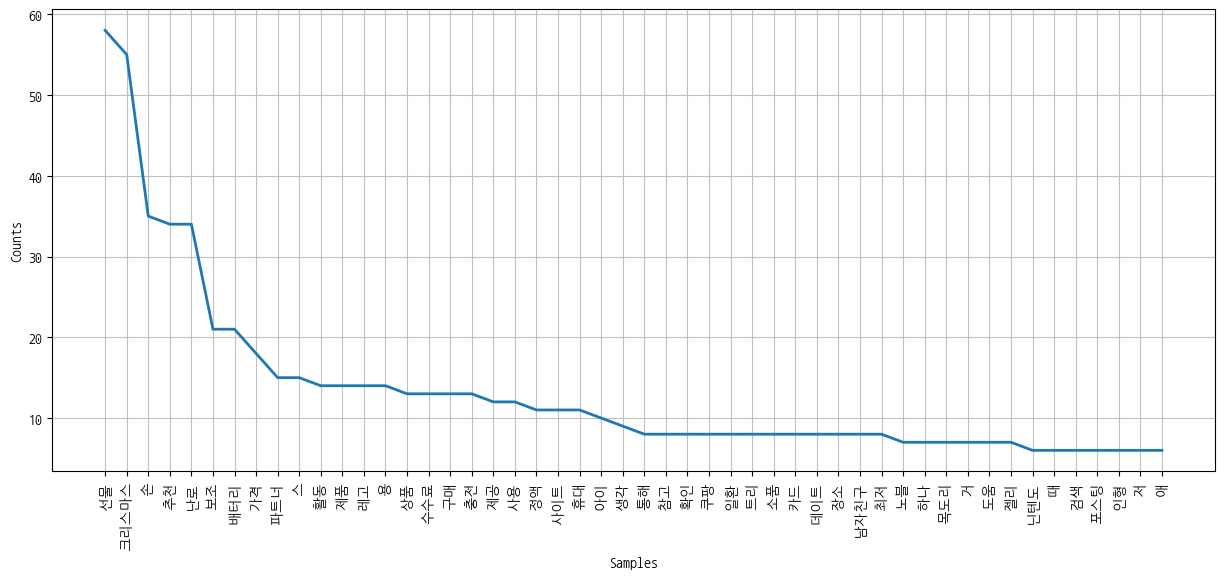

In [79]:
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

## WordCloud

In [80]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

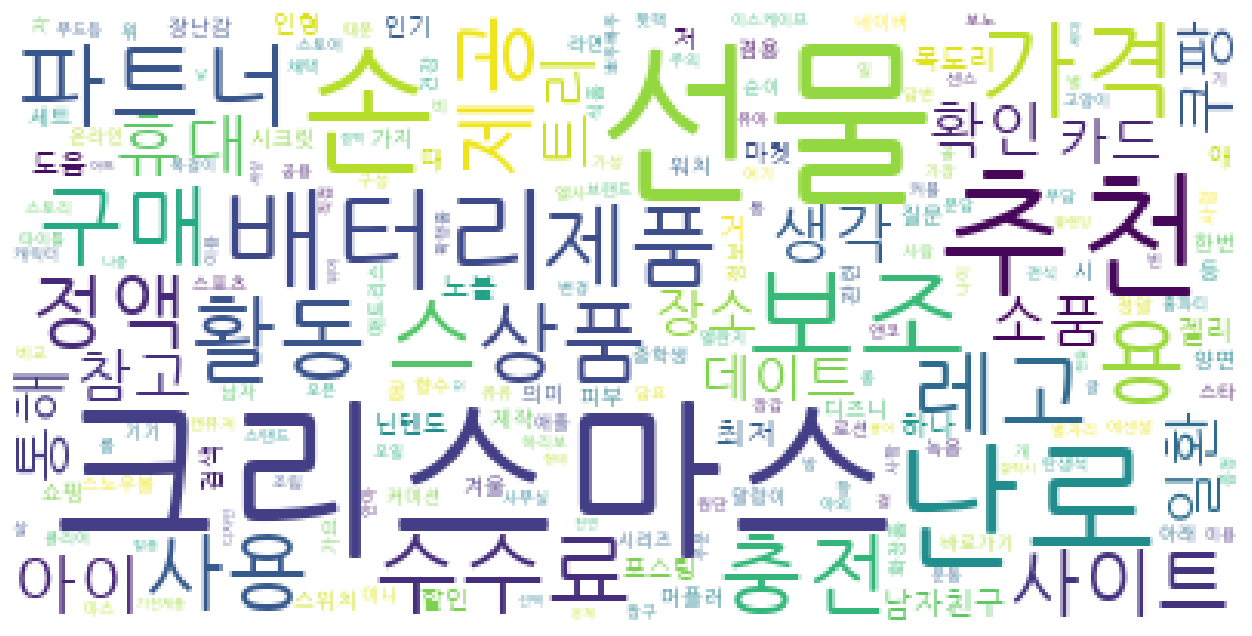

In [81]:
data = ko.vocab().most_common(300)

f_path = '/Library/Fonts/NanumGothicCoding.ttf'

wordcloud = WordCloud(font_path=f_path,
                      relative_scaling = 0.5,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [82]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('../data/present_box.jpg'))
image_colors = ImageColorGenerator(mask)

In [83]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path,
                      relative_scaling = 0.1,
                      mask = mask,
                      background_color='white',
                      min_font_size=1,
                      max_font_size=100
                      ).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

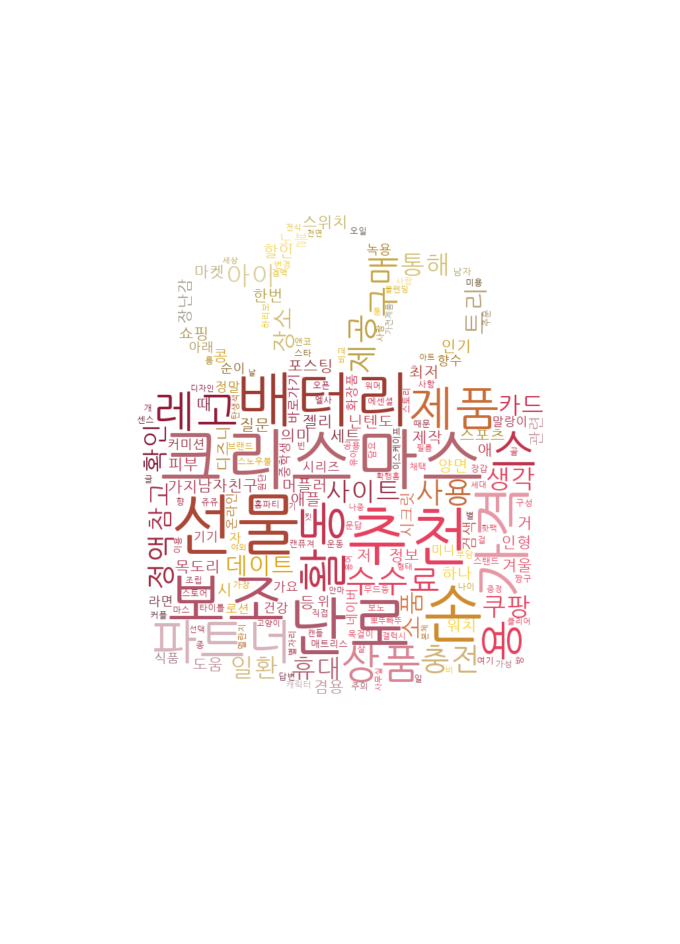

In [84]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors),
           interpolation='bilinear')
plt.axis('off')
plt.show()

## 더 많은 데이터

In [85]:
links = []
html = 'http://kin.naver.com/search/list.nhn?query={key_word}&page={num}'

for n in tqdm(range(1, 10)):
    req = Request(html.format(num=n,
                              key_word=urllib.parse.quote('크리스마스 선물')));
    req.add_header('Referer', 'http://www.naver.com/')

    response = urlopen(req)
    soup = BeautifulSoup(response, 'html.parser')

    links.extend(soup.find_all('dt'))

links

  0%|          | 0/9 [00:00<?, ?it/s]

[<dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=5&amp;dirId=506&amp;docId=432942199&amp;qb=7YGs66as7Iqk66eI7IqkIOyEoOusvA==&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><b>크리스마스 선물</b> 추천</a>
 </dt>,
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=4&amp;dirId=40401&amp;docId=432437230&amp;qb=7YGs66as7Iqk66eI7IqkIOyEoOusvA==&amp;enc=utf8§ion=kin&amp;rank=2&amp;search_sort=0&amp;spq=0" target="_blank"><b>크리스마스 선물</b> 실용적인거 찾아요</a>
 </dt>,
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=5&amp;dirId=50603&amp;docId=431945395&amp;qb=7YGs66as7Iqk66eI7IqkIOyEoOusvA==&amp;enc=utf8§ion=kin&amp;rank=3&amp;search_sort=0&amp;spq=0" target="_blank"><b>크리스마스 선물</b> 추천</a>
 </dt>,
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=4&amp

In [86]:
present_candi_text = []

for each_link in tqdm(links):
    r = requests.get(each_link.a['href'])
    soup_tmp = BeautifulSoup(r.text, 'html.parser')

    search_result = soup_tmp.find_all('div', '_endContentsText')

    time.sleep(0.1)

    for each in search_result:
        present_candi_text.append(each.get_text())

  0%|          | 0/90 [00:00<?, ?it/s]

In [87]:
present_candi_text

['         \u200b닌텐도 스위치 추천드립니다\u200b아니면 애플워치나 갤럭시워치 같은 가전제품도 괜찮구요\u200b이쁜거 귀여운거보단 실용적인 선물을 추천드립니다\u200b더 오래쓰고 안질리고 나중에 중고로 팔 때도 팔기 쉽습니다\u200b\u200bhttps://link.coupang.com/a/FW0p8              닌텐도 스위치 OLED 본체 화이트 + 스포츠타이틀 + 필름 + 겜맥 스포츠킷 COUPANG link.coupang.com            https://link.coupang.com/a/FW0t0              Apple 2022 애플워치 SE 2세대 알루미늄 케이스 COUPANG link.coupang.com            \u200b\u200b\u200b파트너스 활동으로 커미션을 제공받을 수 있음     ',
 '         안녕하세요~^^ 에끄노블입니다. \u200b소중한분께 드리는 선물에 관하여 글을 남겨 주셨는데요 \u200b특별하고 의미있는 에끄노블 캔퓨져 크리스마스 선물로 어떠신가요~??\u200b                               \u200b\u200b에끄노블 캔퓨져는\u200b캔들워머를 이용하여 발향되는 제품으로 캔들형태의 훈증형 방향제입니다. \u200b(캔퓨져라는 용어는 에끄노블이 만든 용어로서 2022년 7월 6일 상표등록을 완료하였습니다.)\u200b소이왁스가 녹으면서 아름다운 꽃을 함께 감상 하실 수 있는 시각적인 힐링요소을 가미한 제품입니다.\u200b오더가 들어올 때마다 똑같은 Preserved flower 아트가 아닌 고객 한분 한분을 생각하며 정성스럽게 직접 디자인하여 만든 이 세상에 단 하나뿐인 나만의 Canffuser의 Preserved flower 아트와 공기정화에 탁월한 솔트로 제작되어 제공해드리는 제품입니다. \u200b추가로 에끄노블 블렌딩 에센셜오일은\u200b테라피 속성에 따른 향 블렌딩을 위하여 100% 천연 에센셜오일만을 사용하

In [88]:
# 문장 작업
present_text = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [89]:
tokens_ko = t.nouns(present_text)
ko = nltk.Text(tokens_ko, name='크리스마스 선물')
ko.vocab().most_common(100)

[('선물', 630),
 ('크리스마스', 521),
 ('추천', 269),
 ('수', 169),
 ('것', 157),
 ('이', 119),
 ('제품', 113),
 ('스', 108),
 ('활동', 96),
 ('구매', 94),
 ('파트너', 93),
 ('수수료', 93),
 ('제공', 85),
 ('아이', 84),
 ('정액', 79),
 ('레고', 79),
 ('저', 79),
 ('가격', 78),
 ('할인', 71),
 ('참고', 69),
 ('쿠팡', 65),
 ('사용', 63),
 ('사이트', 62),
 ('일환', 57),
 ('등', 57),
 ('트리', 57),
 ('때', 56),
 ('세트', 55),
 ('요', 54),
 ('제', 52),
 ('용', 52),
 ('담요', 51),
 ('거', 50),
 ('도움', 50),
 ('인기', 50),
 ('손', 48),
 ('최저', 48),
 ('생각', 46),
 ('포스팅', 45),
 ('답변', 45),
 ('마음', 45),
 ('분', 44),
 ('위', 44),
 ('통해', 44),
 ('목도리', 44),
 ('상품', 44),
 ('카드', 44),
 ('더', 43),
 ('겨울', 43),
 ('장난감', 43),
 ('소품', 42),
 ('장갑', 41),
 ('검색', 40),
 ('링크', 40),
 ('난로', 40),
 ('쇼핑', 39),
 ('요즘', 39),
 ('친구', 39),
 ('부모님', 39),
 ('한번', 38),
 ('골', 38),
 ('아래', 38),
 ('캐릭터', 38),
 ('데이트', 37),
 ('티', 37),
 ('정보', 36),
 ('장소', 36),
 ('일', 36),
 ('미니', 36),
 ('확인', 35),
 ('네이버', 34),
 ('정말', 34),
 ('질문', 33),
 ('어린이', 33),
 ('무드등', 33),
 ('지갑', 33),
 ('인형',

In [90]:
ko.similar('선물')

더 때 소품 엄마 가지 느낌 버선 추천 실용 의미 크리스마스 제품 디자인 전달 영향 포장 라면 관련 것 겨울


In [91]:
ko.similar('크리스마스')

부모님 의미 여자친구 추천 참고 골 준비 단체 생일 수 가격 향수 것 정말 세트 이번 실내 마음 요 누구


In [92]:
stop_words = ['한', '수', '은', '들', '!', '도', '이', '\u200b', '을', '에', ',', '.', '['
              ']', '~', '는', '것', '요', '제', '수', '것', '뼘', '해', '분', '떄문', '더', '줄']

tokens_ko = [each_word for each_word in tokens_ko
                                        if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 630),
 ('크리스마스', 521),
 ('추천', 269),
 ('제품', 113),
 ('스', 108),
 ('활동', 96),
 ('구매', 94),
 ('파트너', 93),
 ('수수료', 93),
 ('제공', 85),
 ('아이', 84),
 ('정액', 79),
 ('레고', 79),
 ('저', 79),
 ('가격', 78),
 ('할인', 71),
 ('참고', 69),
 ('쿠팡', 65),
 ('사용', 63),
 ('사이트', 62),
 ('일환', 57),
 ('등', 57),
 ('트리', 57),
 ('때', 56),
 ('세트', 55),
 ('용', 52),
 ('담요', 51),
 ('거', 50),
 ('도움', 50),
 ('인기', 50),
 ('손', 48),
 ('최저', 48),
 ('생각', 46),
 ('포스팅', 45),
 ('답변', 45),
 ('마음', 45),
 ('위', 44),
 ('통해', 44),
 ('목도리', 44),
 ('상품', 44),
 ('카드', 44),
 ('겨울', 43),
 ('장난감', 43),
 ('소품', 42),
 ('장갑', 41),
 ('검색', 40),
 ('링크', 40),
 ('난로', 40),
 ('쇼핑', 39),
 ('요즘', 39)]

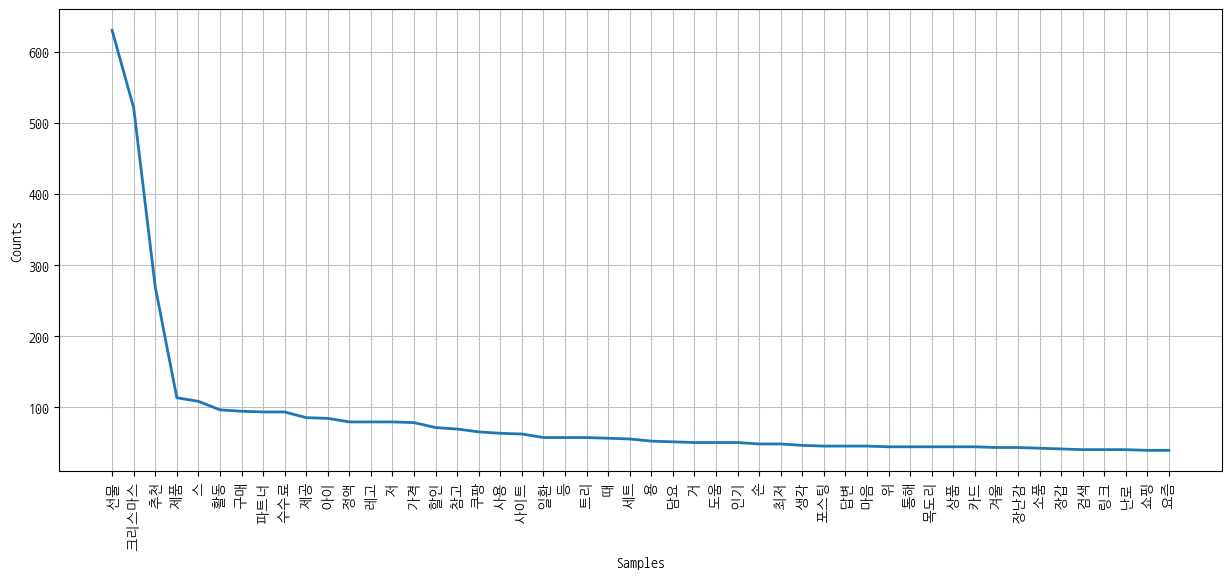

In [93]:
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

## WordCloud(더 많은 데이터)

In [94]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path,
                      relative_scaling = 0.1,
                      mask = mask,
                      background_color='white',
                      min_font_size=1,
                      max_font_size=100
                      ).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

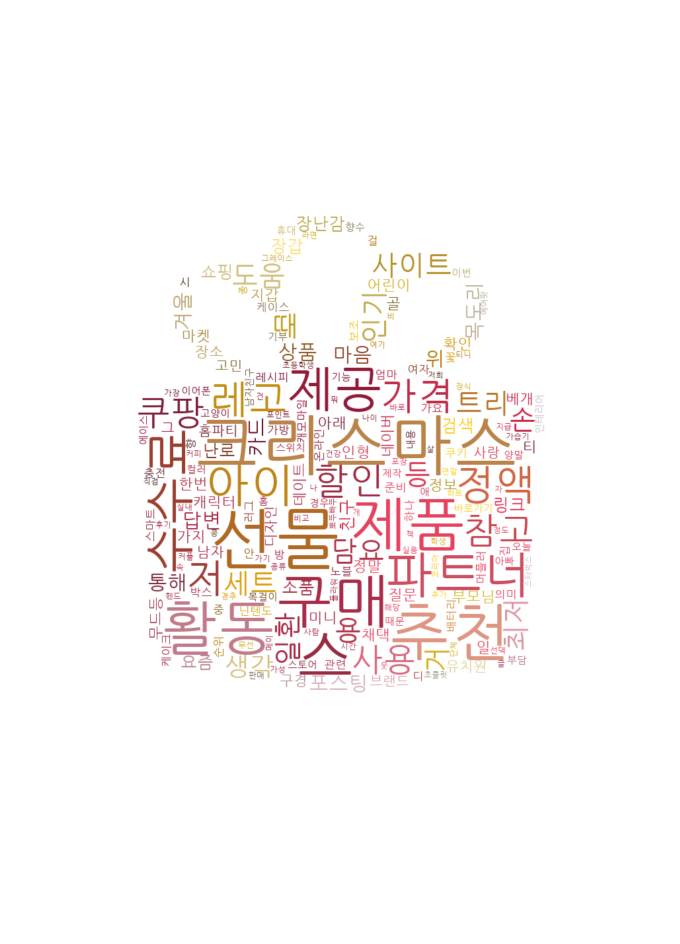

In [95]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors),
           interpolation='bilinear')
plt.axis('off')
plt.show()

## gensim

In [96]:
import gensim
from gensim.models import word2vec

In [97]:
twitter = Okt()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []

    for word in malist:
        if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
            r.append(word[0])
    
    r1 = (' '.join(r)).strip()
    results.append(r1)
    print(r1)

​ 닌텐도 스위치 추천 드리다 ​ 아니다 애플 워치 갤럭시 워치 같다 가전제품 괜찮다 ​ 이쁘다 귀엽다 실용 적 선물 추천 드리다 ​ 더 오래 쓰다 안질리다 나중 중고 팔 때 파다 쉬다 ​ ​https://link.coupang.com/a/FW0p8 닌텐도 스위치 OLED 본체 화이트 스포츠 타이틀 필름 겜맥 스포츠 킷 COUPANG link.coupang.com https://link.coupang.com/a/FW0t0 Apple 2022 애플 워치 SE 2 세대 알루미늄 케이스 COUPANG link.coupang.com ​​​ 파트너 스 활동 커미션 제공 받다 수 있다
안녕하다 끄다 노블 이다 ​ 소중하다 분 드리다 선물 관 하다 글 남기다 주다 ​ 특별하다 의미 있다 끄다 노블 캔퓨져 크리스마스 선물 어떻다 가요 ​ ​​ 끄다 노블 캔퓨져 ​ 캔들 워머 이용 하다 발향 되다 제품 캔들 형태 훈증 형 방향 제입 니 ​ 캔퓨져 용어 끄다 노블 만들다 용어 로서 2022년 7월 6일 상표 등록 완료 하다 ​ 소 이 왁스 녹다 아름답다 꽃 함께 감상 하다 수 있다 시각 적 힐링 요소 을 가미 제품 이다 ​ 오다 들어오다 때 똑같다 Preserved flower 아트 아니다 고객 한 분 한 분 생각 하다 정성 직접 디자인 하다 만들다 이 세상 단 하나 뿐 나 Canffuser 의 Preserved flower 아트 공 기 정화 탁월하다 솔트 제작 되어다 제공 해드리다 제품 이다 ​ 추가 끄다 노블 블렌딩 에센셜 오일 ​ 테라 피 속성 따르다 향 블렌딩 위 하다 100% 천연 에센셜 오일 사용 있다 코로 흡입 되다 향 후각 구르다 통해 뇌 변역 계 전달 되어다 신체 적 정신 적 균형 영향 주다 만큼 끄다 노블 천연 에센셜 오일 선택 신중 기하 있다 ​ 모든 구성 포장 매우 고급스럽다 특별하다 날 소중하다 분 선물 제격 끄다 노블 제품 들 밑 주소 페이지 보다 수 있다 ​ ​ ​smartstore.naver.com/blanc_de_chloe ​https://www.

## 데이터 분석

In [98]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))

In [99]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, vector_size=200, window=10, hs=1, min_count=2, sg=1)
model.save('pres_girl.model')

In [100]:
model.wv.most_similar(positive=['선물'])

[('다가오다', 0.8872125148773193),
 ('ㅋ', 0.8622798323631287),
 ('덜', 0.8382293581962585),
 ('생일', 0.8371187448501587),
 ('크리스마스', 0.8367507457733154),
 ('야하다', 0.8365449905395508),
 ('예', 0.8349606990814209),
 ('거의', 0.8332666158676147),
 ('보여주다', 0.8325727581977844),
 ('모임', 0.8315011262893677)]

In [101]:
model.wv.most_similar(positive=['향수'])

[('여자친구', 0.8006032109260559),
 ('초등학생', 0.7849571108818054),
 ('최저', 0.7380632758140564),
 ('명품', 0.7371594309806824),
 ('여자', 0.731582760810852),
 ('ㅎ', 0.7266297936439514),
 ('겁니다', 0.7219147086143494),
 ('검색', 0.7118480801582336),
 ('혹시', 0.710764467716217),
 ('유용하다', 0.709182858467102)]

In [102]:
model.wv.most_similar(positive=['사랑'])

[('해', 0.9423511028289795),
 ('오늘', 0.9200653433799744),
 ('전하', 0.8946511149406433),
 ('핑거', 0.8664534091949463),
 ('망디', 0.8586741089820862),
 ('초코', 0.835632860660553),
 ('☆', 0.8297604322433472),
 ('최대', 0.8110917806625366),
 ('바크', 0.7760745882987976),
 ('과일', 0.7545820474624634)]

In [103]:
model.wv.most_similar(positive=['파트너'])

[('활동', 0.9613135457038879),
 ('\u200b\u200b\u200b\u200b', 0.9583008885383606),
 ('일정', 0.9384357929229736),
 ('일환', 0.9372085332870483),
 ('\u200b\u200b\u200b\u200b\u200b\u200b', 0.9292972087860107),
 ('로켓', 0.9288487434387207),
 ('커미션', 0.924964964389801),
 ('쿠팡', 0.9237502813339233),
 ('정액', 0.9200332164764404),
 ('수수료', 0.9172164797782898)]

In [104]:
model.wv.most_similar(positive=['쿠팡'])

[('\u200b\u200b\u200b\u200b', 0.9385508894920349),
 ('일환', 0.925317645072937),
 ('파트너', 0.9237503409385681),
 ('활동', 0.9166917204856873),
 ('포스팅', 0.9143654704093933),
 ('\u200b\u200b\u200b\u200b\u200b\u200b', 0.9102961421012878),
 ('로켓', 0.9061158895492554),
 ('스', 0.8923898935317993),
 ('♥', 0.8717042803764343),
 ('이', 0.8699640035629272)]

In [105]:
model.wv.most_similar(positive=['무드등'])

[('달', 0.8208963871002197),
 ('수면', 0.8048258423805237),
 ('아크릴', 0.802811324596405),
 ('nico', 0.7927249073982239),
 ('LED', 0.7919253706932068),
 ('조명', 0.7912560105323792),
 ('수유', 0.7867317795753479),
 ('램프', 0.7761112451553345),
 ('선풍기', 0.7591735124588013),
 ('취침', 0.7515832185745239)]